<center>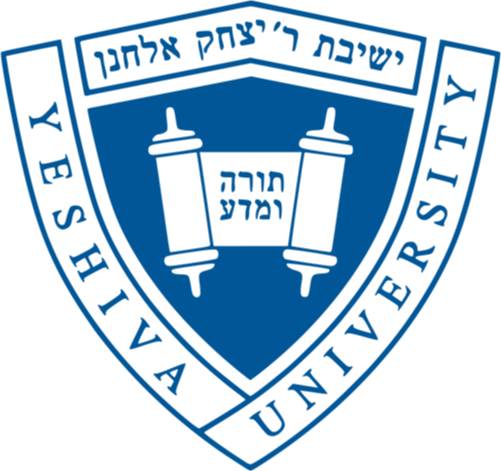</center>

<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5007 Neural Networks and Deep Learning</h1>
<p>
<h2 style='text-align: center;'>Homework 03</h1>
<br><br>

<h3 style='text-align: center;'>Radek Jan Holik</h3>
<br>
<br>

# 1. Apply Averaging filter of image eye2_1 with

## Uniform weights: [1 1 1; 1 1 1; 1 1 1] * (1/9)

In [289]:
# Import some important packages here
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [290]:
# Read image
im_e = cv.imread('data/eye2_1.png')

# Resize / Change its dimensions
resized_im_e = cv.resize(im_e, (480,320), interpolation = cv.INTER_AREA)

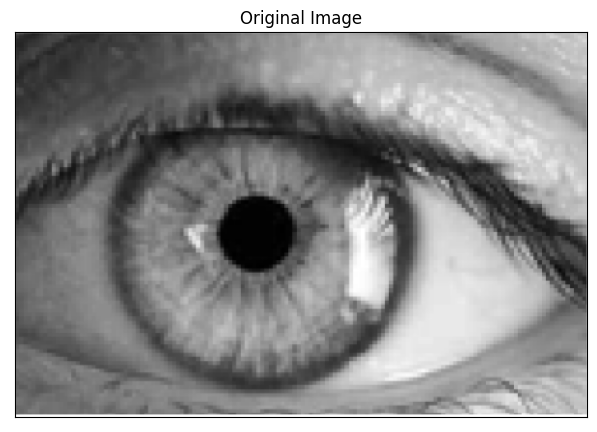

In [291]:
# Show image
plt.figure(figsize = (8, 5))
plt.imshow(im_e,'gray')
plt.title("Original Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [292]:
# Uniform weights
mask1  = np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1]]) * (1/9)
averageImg = cv.filter2D(src = resized_im_e, ddepth = -1, kernel = mask1)

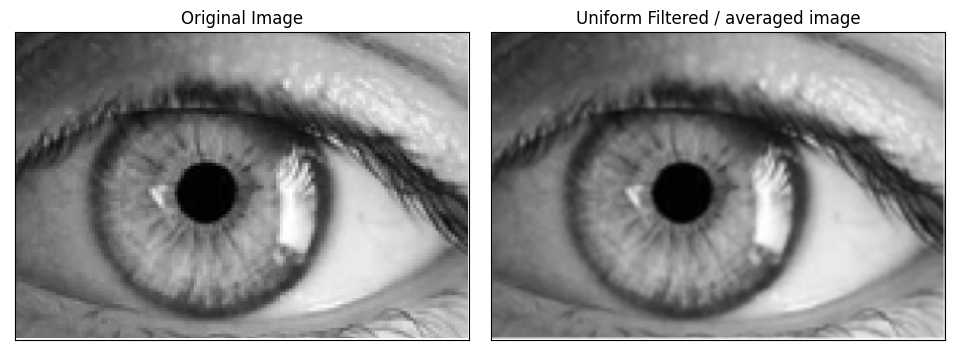

In [293]:
# Show images
images = [im_e, averageImg]
titles = ["Original Image","Uniform Filtered / averaged image"]

plt.figure(figsize = (12, 4))
for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB), aspect="auto")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.05)

plt.show()

## Nonuniform weights: [1 2 1; 2 4 2; 1 2 1] * (1/16) 

In [294]:
# nonuniform weights
mask2 = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]]) * (1/16)
averageImg2 = cv.filter2D(src = resized_im_e, ddepth = -1, kernel = mask2)

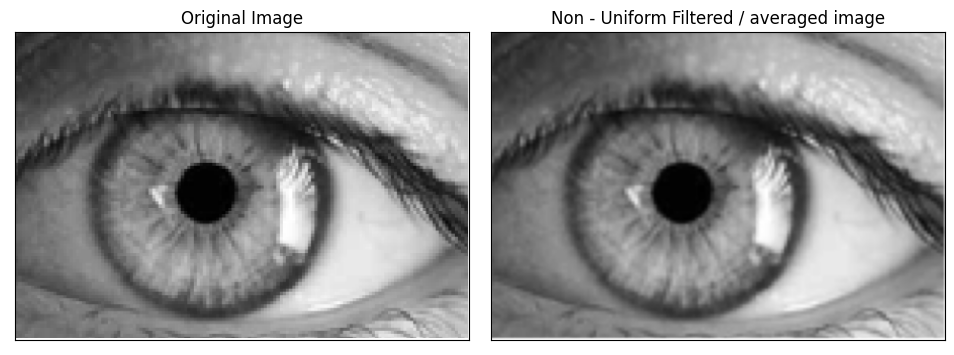

In [295]:
# Show images
images = [im_e, averageImg2]
titles = ["Original Image","Non - Uniform Filtered / averaged image"]

plt.figure(figsize = (12, 4))
for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB), aspect="auto")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.05)

plt.show()

# 2. Show the Gaussian function

In [296]:
# Gaussian function
N = 3.0
u = np.linspace(-N, N)
v = u
[X, Y] = np.meshgrid(u, v)
z = (1/(2 * np.pi)) * np.exp( -( X**2 /2) - (Y**2 /2) ) # sigma =1

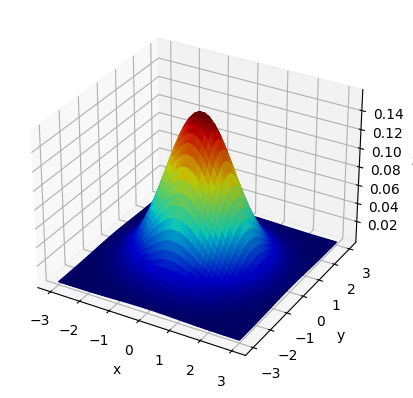

In [297]:
# Plot the surface
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot the surface
my_col = cm.jet(z/np.amax(z))
ax.plot_surface(X, Y, z, facecolors = my_col, antialiased = True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

# 3. Apply Gaussian image filtering of image eye2_1 

In [317]:
# Read image
im_e = cv.imread('data/eye2_1.png')

# Resize / Change its dimensions
resized_im_e = cv.resize(im_e, (480,320), interpolation = cv.INTER_AREA)

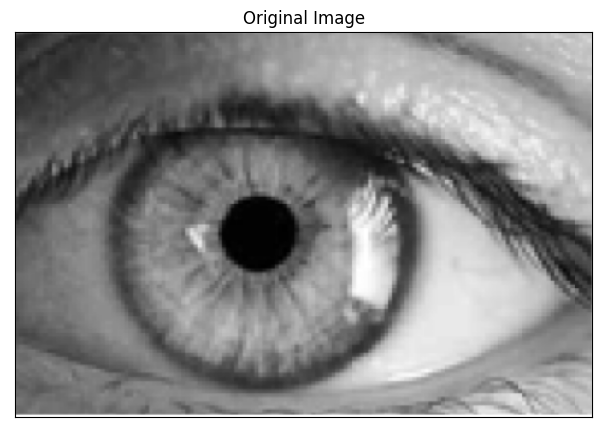

In [318]:
# Show image
plt.figure(figsize = (8, 5))
plt.imshow(resized_im_e,'gray')
plt.title("Original Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [319]:
# Kernel size
hsize = 30

In [352]:
images = [resized_im_e]
titles = ["Original Image"]
for i in range(1, 20, 4):
    # Kernel creation
    u = cv.getGaussianKernel(ksize = hsize, sigma = s)
    h = np.outer(u, u)

    # Filtration
    outIm = cv.filter2D(src = resized_im_e, ddepth = -1, kernel = h)
    
    images.append(outIm)
    titles.append("Kernel Size = 31 x 31, $\sigma$ = " + str(i))

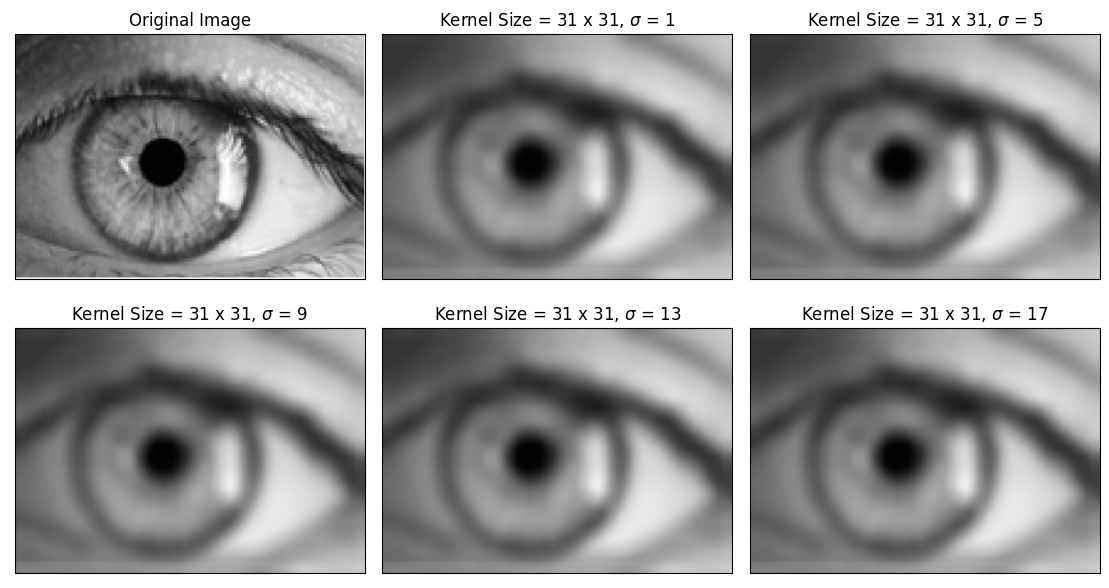

In [356]:
# Show images
plt.figure(figsize = (14, 7))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB), aspect="auto")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.05)

plt.show()

# 4. Apply Unsharp mask of image eye2_1 

The “unsharp” mask is used to sharpen an image.

In [303]:
# Read image
im_e = cv.imread('data/eye2_1.png')

# Resize / Change its dimensions
resized_im_e = cv.resize(im_e, (480,320), interpolation = cv.INTER_AREA)

In [304]:
# Blurred image with Uniform weights / Average
mask1  = np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1]]) * (1/9) # average image
averageImg = cv.filter2D(src = resized_im_e, ddepth = -1, kernel = mask1)
sharpImg = resized_im_e + ( resized_im_e - averageImg )

In [306]:
# Second method for blurring
hsize = 9 # Kernel size
sigma = 5
gaussian_kernel = cv.getGaussianKernel(ksize = hsize, sigma = sigma)
kernel_2D = gaussian_kernel @ gaussian_kernel.T
gImg = cv.filter2D(src = resized_im_e, ddepth = -1, kernel = kernel_2D)
sharpImg2 = resized_im_e + ( resized_im_e - gImg )

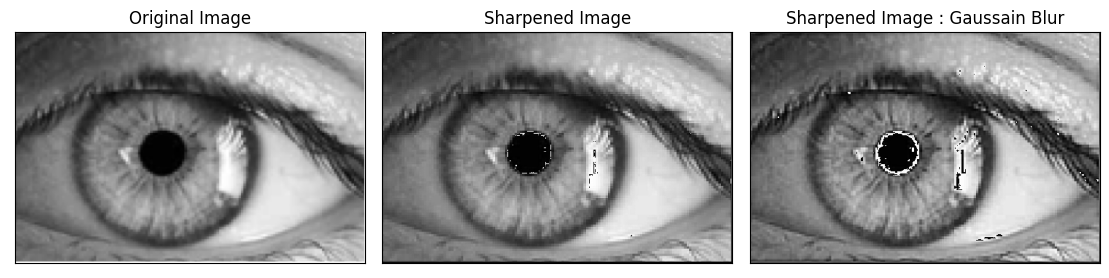

In [359]:
# Show images
images = [resized_im_e, sharpImg, sharpImg2]
titles = ["Original Image","Sharpened Image","Sharpened Image : Gaussain Blur"]

plt.figure(figsize = (14, 3))
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB), aspect="auto")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.05)

plt.show()

# 5. Remove noise of noise_bridge image using

## Gaussain filter

In [308]:
# Read image
im_b = cv.imread('data/noise_bridge.png')

# Resize / Change its dimensions
resized_im_b = cv.resize(im_b, (480, 320), interpolation = cv.INTER_AREA)

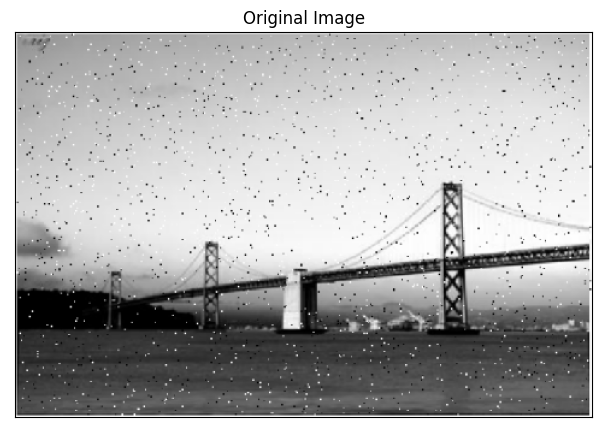

In [309]:
# Show image
plt.figure(figsize = (8, 5))
plt.imshow(resized_im_b ,'gray')
plt.title("Original Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [310]:
# Gaussain filtering to remove noise
hsize = 3 # Kernel size
sigma = 1
gaussian_kernel = cv.getGaussianKernel(ksize = hsize, sigma = sigma)
kernel_2D = gaussian_kernel @ gaussian_kernel.T # Make kernel
gImg = cv.filter2D(src = resized_im_b, ddepth = -1, kernel = kernel_2D) # % filter image with kernel 'kernel_2D'

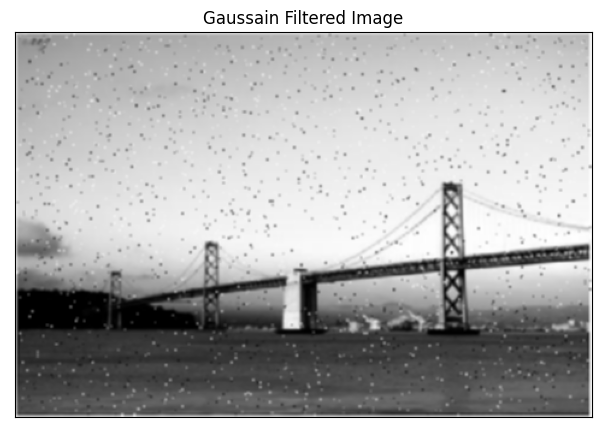

In [311]:
# Show image
plt.figure(figsize = (8, 5))
plt.imshow(gImg,'gray')
plt.title("Gaussain Filtered Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Uniform filter

In [312]:
# Uniform weights
mask1  = np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1]]) * (1/9)
averageImg = cv.filter2D(src = resized_im_b, ddepth = -1, kernel = mask1)

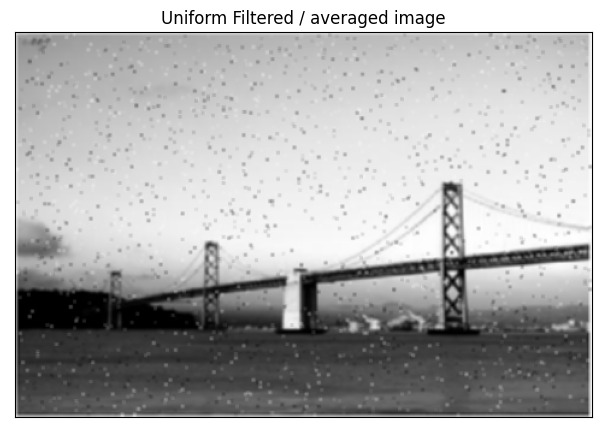

In [313]:
# Show image
plt.figure(figsize = (8, 5))
plt.imshow(averageImg,'gray')
plt.title("Uniform Filtered / averaged image")
plt.xticks([])
plt.yticks([])
plt.show()

## Median filter

In [314]:
# Median Filtering
medImg = cv.medianBlur(resized_im_b, 3)

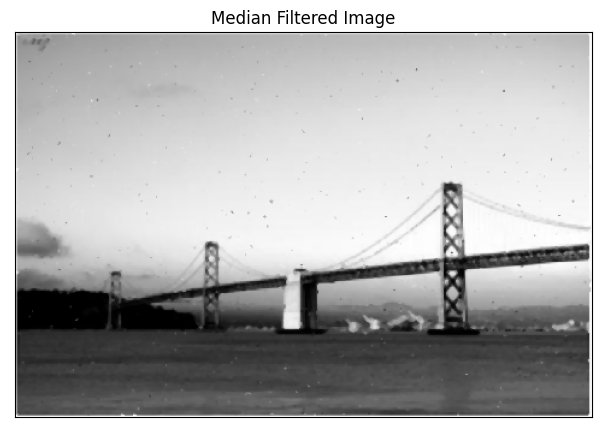

In [315]:
# Show image
plt.figure(figsize = (8, 5))
plt.imshow(medImg,'gray')
plt.title("Median Filtered Image")
plt.xticks([])
plt.yticks([])
plt.show()

# References

- Image Filtering Using Convolution in OpenCV : https://www.geeksforgeeks.org/image-filtering-using-convolution-in-opencv/

- 3D Surface plotting in Python using Matplotlib : https://www.geeksforgeeks.org/3d-surface-plotting-in-python-using-matplotlib/

- Median Filtering with Python and OpenCV : https://medium.com/@florestony5454/median-filtering-with-python-and-opencv-2bce390be0d1